In [1]:
%matplotlib inline
import numpy as np
import utils
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import data
from scipy.misc import imresize

plt.style.use('ggplot')

In [2]:
files = utils.get_celeb_files()

In [3]:
raw_imgs = utils.get_celeb_imgs()


In [4]:
# crop all images to the same dimensions
imgs = []

for img in raw_imgs:
    #square = utils.imcrop_tosquare(img)
    crop = utils.imcrop(img, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)


In [5]:
# turn into batch dimension

img_data = np.array(imgs)
print(img_data.shape)

(100, 64, 64, 3)


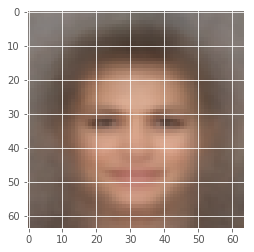

In [6]:
# look at the mean of the batch channel 
mean_img = np.mean(img_data,axis=0)
plt.imshow(mean_img.astype(np.uint8))

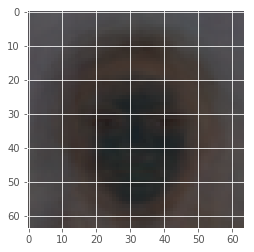

In [7]:
# computed standard deviation 
std_img = np.std(img_data,axis=0)
plt.imshow(std_img.astype(np.uint8))

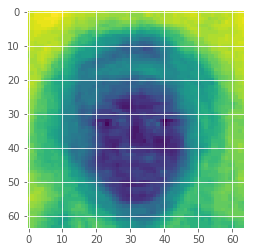

In [8]:
# We can try to look at the average variance over all color channels by taking their mean:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))

In [9]:
# convert batch dimension to 1 dimensional array 
flattened = img_data.ravel()
#print(data[:1])
#print(flattened[:10])

In [10]:
plt.hist(flattened.ravel(),255)

(array([ 9508.,  8629.,  8413.,  6218.,  5784.,  5451.,  5499.,  5537.,
         5359.,  5420.,  5649.,  5809.,  6106.,  6255.,  6057.,  6222.,
         6522.,  6431.,  6591.,  6596.,  6418.,  6434.,  6363.,  6317.,
         6186.,  6126.,  6073.,  6207.,  6126.,  6431.,  6575.,  6213.,
         6253.,  6407.,  6301.,  6360.,  6397.,  6543.,  6618.,  6555.,
         6505.,  6281.,  6243.,  6503.,  6631.,  6365.,  5915.,  6035.,
         5922.,  6122.,  5846.,  5792.,  5880.,  5684.,  5447.,  5605.,
         5509.,  5074.,  5152.,  5003.,  5033.,  5013.,  4932.,  4876.,
         4997.,  5045.,  5011.,  4929.,  5038.,  5106.,  4947.,  4989.,
         4838.,  5002.,  4836.,  5013.,  4742.,  5015.,  5003.,  5068.,
         4983.,  4959.,  4962.,  5047.,  4894.,  4887.,  4910.,  4944.,
         4971.,  4749.,  4926.,  4967.,  4883.,  5040.,  4773.,  4945.,
         5014.,  5064.,  5041.,  5050.,  5062.,  4913.,  4934.,  4940.,
         4824.,  5093.,  4800.,  5000.,  5024.,  4939.,  5115., 

(array([   6.,    3.,    7.,    8.,    6.,    7.,    8.,    7.,    5.,
          10.,    5.,    9.,   12.,    8.,   12.,   10.,    9.,   20.,
          25.,   14.,   21.,   19.,   24.,   20.,   25.,   30.,   31.,
          35.,   42.,   38.,   37.,   53.,   39.,   49.,   53.,   57.,
          53.,   57.,   49.,   63.,   76.,   76.,   84.,   89.,  101.,
         110.,  126.,  112.,  120.,   88.,   99.,   98.,   97.,  104.,
          98.,  105.,  113.,  120.,   92.,  122.,   94.,  116.,   81.,
         122.,  112.,  101.,  106.,  100.,  120.,   98.,  140.,  125.,
         137.,  128.,  122.,  123.,  113.,  122.,  124.,  114.,  130.,
         124.,  125.,  114.,   95.,  124.,  116.,  120.,  135.,  118.,
         103.,  116.,  111.,  104.,  110.,  112.,  111.,  123.,  120.,
         138.,  122.,  128.,  115.,  125.,  107.,  110.,   94.,  124.,
          92.,  123.,  104.,  107.,   81.,   83.,   86.,   81.,   77.,
          82.,   69.,   54.,   74.,   76.,   61.,   73.,   57.,   64.,
      

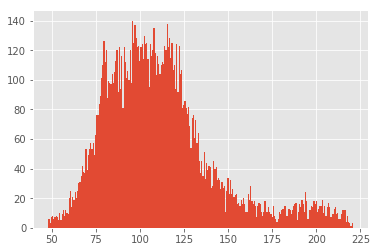

In [11]:
# histogram equalization of mean image
plt.hist(mean_img.ravel(),255)

In [12]:
#compare the histogram before and after "normalizing our data"
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((img_data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

TypeError: 'module' object is not subscriptable

(-5, 5)

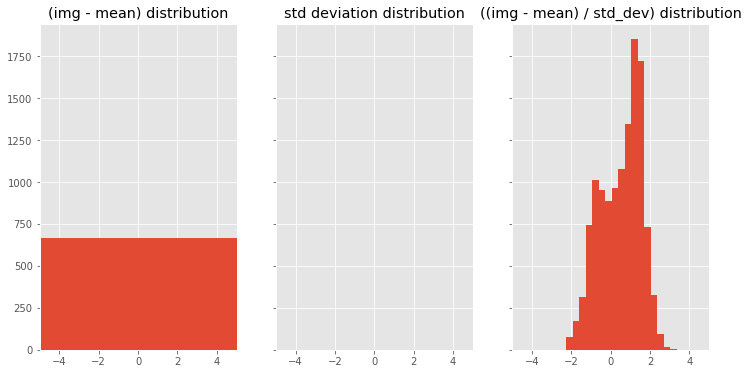

In [13]:
# complete the normalization by dividing by the standard deviation of our dataset:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((img_data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((img_data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

# rescale to get a more in-depth view on whats happening
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

In [14]:
# exploring tensorflow linear space function
x = tf.linspace(-3.0,3.0,100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [15]:
# inspect underlying graph -- note you can make individual graphs by calling tf.Graph()
g = tf.get_default_graph()

# get a list of operations in the graph 
print([op.name for op in g.get_operations()])

# check the result of a tensorflow operation
g.get_tensor_by_name('LinSpace' + ':0')

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']


<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

In [16]:
# create tensorflow session 
sess = tf.Session()
computed_x = sess.run(x)
print(computed_x)

# can close session when we're done
sess.close()

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

In [17]:
# use interactive session
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

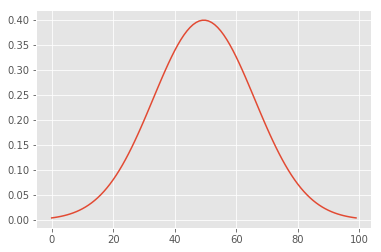

In [18]:
# try to create Guassian curve 

# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

res = z.eval()
plt.plot(res)

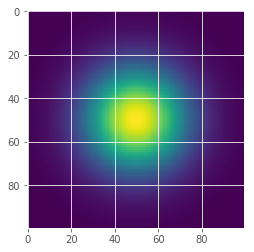

In [19]:
# now trying 2D guassian kernal 
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

(512, 512)


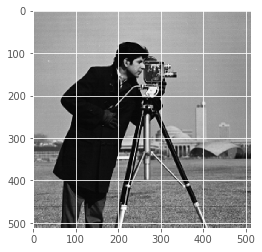

In [20]:

## ======== Convolving an image with a gaussian ============ ## 
img = data.camera().astype(np.float32)
plt.imshow(img,cmap='gray')
print(img.shape)


In [21]:
img_4d = tf.reshape(img,[1,img.shape[0],img.shape[1],1],name='ReshapedCameraImage')
print(img_4d)
print(img_4d.get_shape().as_list())

Tensor("ReshapedCameraImage:0", shape=(1, 512, 512, 1), dtype=float32)
[1, 512, 512, 1]


In [22]:
# reshape gaussian kernel to 4d as well
z_4d = tf.reshape(z_2d,[ksize,ksize,1,1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


(1, 512, 512, 1)


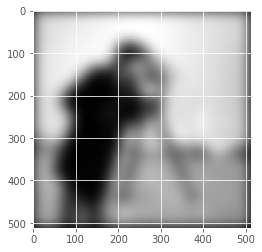

In [25]:
# can now use gaussian kernal to convolve image
convolved = tf.nn.conv2d(img_4d,z_4d,strides=[1,1,1,1],padding='SAME')
res = convolved.eval()
print(res.shape)


# plot image - need to convert back to 2d shape
plt.imshow(np.squeeze(res),cmap='gray')


In [26]:
# modulate gaussian with sin wave to create gabor kernel

# first get a set of values the same range as gaussian
xs = tf.linspace(-3.0,3.0,ksize)

# calulate sin waves
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

In [27]:
# convert 1 dimensional vector to matrix
ys = tf.reshape(ys,[ksize,1])

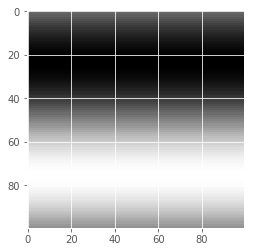

In [28]:
# repeat wave across matrix using multiplication of ones
ones = tf.ones((1,ksize))
wave = tf.matmul(ys,ones)
plt.imshow(wave.eval(),cmap='gray')

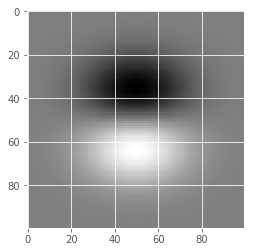

In [29]:
# multiply gaussian kernel by this wave to get gabor 
gabor = tf.multiply(wave,z_2d)
plt.imshow(gabor.eval(),cmap='gray')

In [34]:
# manipulating image with gabor

img = tf.placeholder(tf.float32,shape=[None,None],name='img')

# We'll reshape the 2d image to a 4-d tensor just like before:
# Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# We use it to reshape our H x W image to include a channel dimension of 1
# our new dimensions will end up being: H x W x 1

# first expand to 3d
img_3d = tf.expand_dims(img,2)
dims = img_3d.get_shape()
print(dims)

# now go 4d
img_4d = tf.expand_dims(img_3d,0)
print(img_4d.get_shape().as_list())

# create placeholders for gabor parameters
mean = tf.placeholder(tf.float32,name='mean')
sigma = tf.placeholder(tf.float32,name='sigma')
ksize = tf.placeholder(tf.int32,name='ksize')

# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0,3.0,ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

#get a 2d gaussian(?)
z_2d = tf.matmul(tf.reshape(z,tf.stack([ksize,1])),
                tf.reshape(z,tf.stack([1,ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys,tf.stack([ksize,1]))
ones = tf.ones(tf.stack([1,ksize]))
wave = tf.matmul(ys,ones)
gabor = tf.multiply(wave,z_2d)
gabor_4d = tf.reshape(gabor,tf.stack([ksize,ksize,1,1]))

# finally convolve image with gabor
convolved = tf.nn.conv2d(img_4d,gabor_4d,strides=[1,1,1,1],padding='SAME',name='gabor-convolved')
#convolved_img = convolved

# this is why we don't need to squeeze like before
convolved_img = convolved[0,:,:,0]


(?, ?, 1)
[1, None, None, 1]


(512, 512)


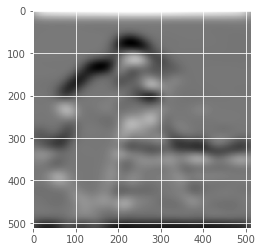

In [35]:
# run the graph! remember to fill placeholders
res = convolved_img.eval(feed_dict={
    img:data.camera(),
    mean:0.0,
    sigma:1.0,
    ksize:100
})
print(res.shape)
plt.imshow(res,cmap='gray')